Pada bagian ini akan dijelaskan mengenai metode reduksi dimensi dengan menggunakan :
- PCA
- LDA
- TSE

Dengan menggunakan metode ini dapat ditampilkan plot 2d dari data yang dimiliki

In [56]:
import pandas as pd                                # pandas untuk preprasi data (fungsinya seperi microsoft excel)
import matplotlib.pyplot as plt                    # matplotlib untuk visualisasi data
from sklearn.decomposition import PCA              # PCA for reductional dimention
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np

In [57]:
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median, inplace=True)
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]
num_list = data.select_dtypes(exclude=["object"]).columns

dummies = pd.get_dummies(data.ocean_proximity)
data[dummies.columns] = dummies
data = data.drop("ocean_proximity", axis=1)

In [58]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

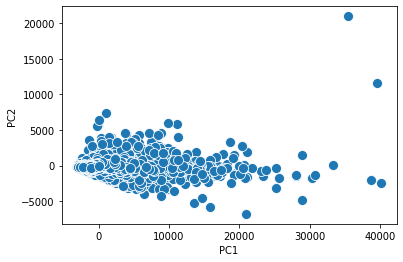

In [59]:
pca = PCA(n_components=2)
X = data.drop("median_house_value", axis=1)
pca_trans = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_trans, columns=["PC1","PC2"])
sns.scatterplot(data=df_pca, x="PC1", y="PC2", s=100)

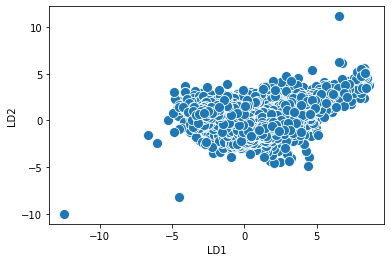

In [60]:
lda = LinearDiscriminantAnalysis(n_components=2)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]
lda_trans = lda.fit_transform(X, y)
df_lda = pd.DataFrame(lda_trans, columns=["LD1","LD2"])
sns.scatterplot(data=df_lda, x="LD1", y="LD2", s=100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


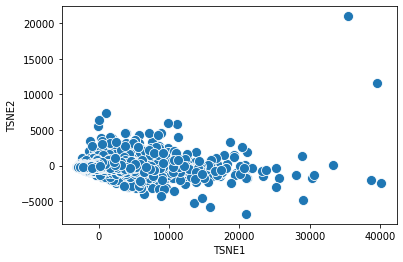

In [62]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3)
X = data.drop("median_house_value", axis=1)
tsne_trans = tsne.fit_transform(X)
df_tsne = pd.DataFrame(tsne_trans, columns=["TSNE1","TSNE2"])
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", s=100)

In [63]:
data["house_value_label"] = pd.qcut(data["median_house_value"],
        [0, .25, .5, .75, .9, 1.], labels=False).astype(str)

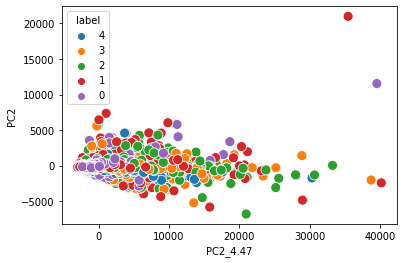

Silhouete Coeffient: -0.08


In [64]:
pca = PCA(n_components=2)
X = data.drop(["house_value_label","median_house_value"], axis=1)
pca_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(pca_trans, columns=["PC1","PC2"])
df_pca["label"] = data["house_value_label"]

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="label", s=100)
ratio = pca.explained_variance_ratio_
plt.xlabel("PC1_{}".format(str(round(ratio[0]*100, 2))))
plt.xlabel("PC2_{}".format(str(round(ratio[1]*100, 2))))
plt.show()

coef = silhouette_score(df_pca[["PC1","PC2"]], df_pca["label"])
print("Silhouete Coeffient: {}".format(str(round(coef, 2))))

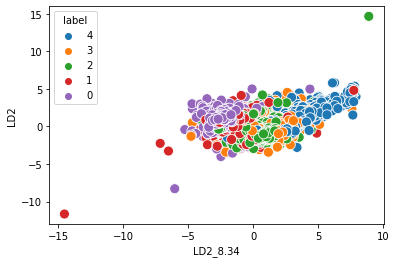

Silhouete Coeffient: 0.02


In [65]:
lda = LinearDiscriminantAnalysis(n_components=2)
X = data.drop(["house_value_label","median_house_value"], axis=1)
y = data["house_value_label"]
lda_trans = lda.fit_transform(X,y)

df_lda = pd.DataFrame(lda_trans, columns=["LD1","LD2"])
df_lda["label"] = data["house_value_label"]

sns.scatterplot(data=df_lda, x="LD1", y="LD2", hue="label", s=100)
ratio = lda.explained_variance_ratio_
plt.xlabel("LD1_{}".format(str(round(ratio[0]*100, 2))))
plt.xlabel("LD2_{}".format(str(round(ratio[1]*100, 2))))
plt.show()

coef = silhouette_score(df_lda[["LD1","LD2"]], df_lda["label"])
print("Silhouete Coeffient: {}".format(str(round(coef, 2))))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


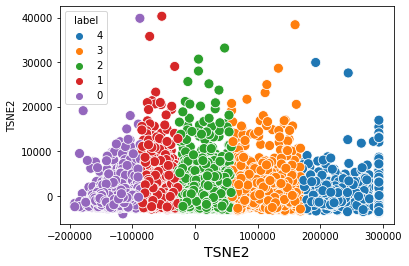

In [72]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3)
X = data.drop(["house_value_label"], axis=1)
tsne_trans = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_trans, columns=["TSNE1","TSNE2"])
df_tsne["label"] = data["house_value_label"]

sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="label", s=100)
# ratio = tsne.explained_variance_ratio_
plt.xlabel("TSNE1", fontsize=14)
plt.xlabel("TSNE2", fontsize=14)
plt.show()

Dari analisis PCA dengan menggunakan data diatas hasil plot 2D tidak terpisahkan cukup besar karena variasi antar kelas data tidak terlalu besar, ini ditandai dengan nilai silhouete coefficient yang kecil. Pemisahan dengan PCA akan memperoleh hasil silhouete yang besar jika variance antar kelas data cukup besar. Kita lihat hasil analisis PCA dengan menggunakan data yang berbeda, disini digunakan hand-written digit.

In [73]:
from sklearn.datasets import load_digits

In [74]:
digits = load_digits()

5


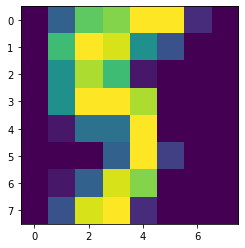

In [75]:
i = 15
plt.imshow(digits["data"][i].reshape(8,8))
print(digits["target"][i])

In [76]:
df_digit = pd.DataFrame(digits["data"])
df_digit["target"] = digits["target"]

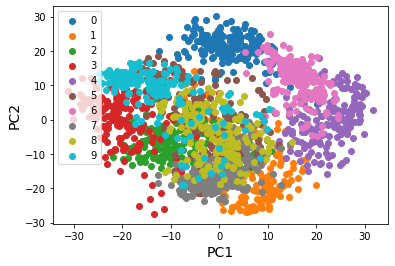

In [77]:
pca = PCA(n_components=2)
X = df_digit.drop("target", axis=1)
pca_trans = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_trans, columns=["PC1","PC2"])
df_pca["label"] = df_digit["target"]

for g in df_pca.label.unique():
  i = df_pca[df_pca.label == g]
  plt.scatter(i["PC1"], i["PC2"], label=g)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.legend()

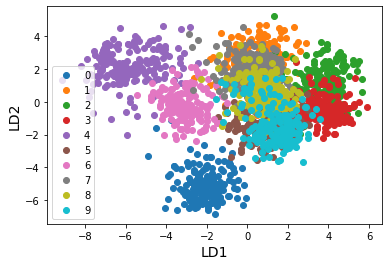

In [78]:
lda = LinearDiscriminantAnalysis(n_components=2)
X = df_digit.drop("target", axis=1)
y = df_digit["target"]
lda_trans = lda.fit_transform(X,y)
df_lda = pd.DataFrame(lda_trans, columns=["LD1","LD2"])
df_lda["label"] = df_digit["target"]

for g in df_lda.label.unique():
  i = df_lda[df_lda.label == g]
  plt.scatter(i["LD1"], i["LD2"], label=g)
plt.xlabel("LD1", fontsize=14)
plt.ylabel("LD2", fontsize=14)
plt.legend()

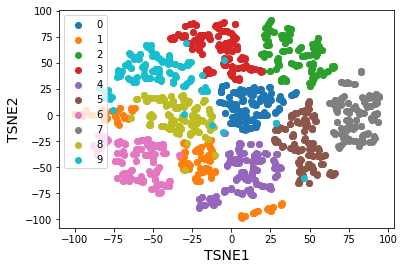

In [79]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
X = df_digit.drop("target", axis=1)
tsne_trans = tsne.fit_transform(X)
df_tsne = pd.DataFrame(tsne_trans, columns=["TSNE1","TSNE2"])
df_tsne["label"] = df_digit["target"]

for g in df_tsne.label.unique():
  i = df_tsne[df_tsne.label == g]
  plt.scatter(i["TSNE1"], i["TSNE2"], label=g)
plt.xlabel("TSNE1", fontsize=14)
plt.ylabel("TSNE2", fontsize=14)
plt.legend()